# Python Project - (Prosper Loan Analysis)
## by (Joseph Anumu George)

## Introduction
> Prosper loan dataset ia a large dataframe with 81 titled columns and 113937 rows with stores in every information of borrowers and there loans from 2005 - 2016. It is a very large dataset with a lot of informations. Only neccessary columns and rows needed for this analysis will be focused on.

  





## Preliminary Wrangling

In [98]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [99]:
df = pd.read_csv('Prosper_Loan.csv')

In [100]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> This dataset is a Linear Data Structure, arranged in Arrays consisting of 81 columns and 113937 rows.

### What is/are the main feature(s) of interest in your dataset?

>**1**:The variations in the Loan status of the borrower

>**3**: The Lender's Yield on Each of The Loan Issued.

>**4**: The Employment Status of the Borrower.

>**5**: The Major Reason responsible for borrowing.

>**6**: The Highest Borrowing State.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCreationDate, LoanStatus, LenderYield, ProsperScore, ListingCategory, BorrowerState, Investors,         EmploymentStatus,

## Univariate Exploration

> In this section,I investigated the distributions of individual variables. 
I soughted to  see unusual points or outliers, taking a deeper look to clean things up
and prepared myself to look at relationships between variables.




### checking the Data Types of the column in the data

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Taking a Look at the columns that will help Investigate the findings

In [102]:
ndf = df.iloc[:,[2,5,9,15,16,17,18,19,20,21]]
ndf

,ListingCreationDate,LoanStatus,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,09:29.3,Completed,0.1380,NaN,0,CO,Other,Self-employed,2.0,True
1,28:07.9,Current,0.0820,7.0,2,CO,Professional,Employed,44.0,False
2,00:47.1,Completed,0.2400,NaN,0,GA,Other,Not available,NaN,False
3,02:35.0,Current,0.0874,9.0,16,GA,Skilled Labor,Employed,113.0,True
4,38:39.1,Current,0.1985,4.0,2,MN,Executive,Employed,44.0,True
...,...,...,...,...,...,...,...,...,...,...
113932,55:02.7,Current,0.1764,5.0,1,IL,Food Service Management,Employed,246.0,True
113933,42:55.3,FinalPaymentInProgress,0.1010,8.0,7,PA,Professional,Employed,21.0,True
113934,49:12.7,Current,0.2050,3.0,1,TX,Other,Employed,84.0,True
113935,18:26.6,Completed,0.2505,5.0,2,GA,Food Service,Full-time,94.0,True


### changing the ListingCreationDate datatype to date-time(ns)

In [103]:
pd.to_datetime(ndf.ListingCreationDate, errors ='coerce')
ndf.ListingCreationDate = pd.to_datetime(ndf.ListingCreationDate, errors ='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_14056\848396116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.ListingCreationDate = pd.to_datetime(ndf.ListingCreationDate, errors ='coerce')


In [104]:
ndf

,ListingCreationDate,LoanStatus,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2023-02-15 09:29:18,Completed,0.1380,NaN,0,CO,Other,Self-employed,2.0,True
1,NaT,Current,0.0820,7.0,2,CO,Professional,Employed,44.0,False
2,2023-02-15 00:47:06,Completed,0.2400,NaN,0,GA,Other,Not available,NaN,False
3,2023-02-15 02:35:00,Current,0.0874,9.0,16,GA,Skilled Labor,Employed,113.0,True
4,NaT,Current,0.1985,4.0,2,MN,Executive,Employed,44.0,True
...,...,...,...,...,...,...,...,...,...,...
113932,NaT,Current,0.1764,5.0,1,IL,Food Service Management,Employed,246.0,True
113933,NaT,FinalPaymentInProgress,0.1010,8.0,7,PA,Professional,Employed,21.0,True
113934,NaT,Current,0.2050,3.0,1,TX,Other,Employed,84.0,True
113935,2023-02-15 18:26:36,Completed,0.2505,5.0,2,GA,Food Service,Full-time,94.0,True


### extracting the year from the ListingCreationDate column

In [105]:
ndf['ListingCreationDate'] = ndf['ListingCreationDate'].dt.strftime('%Y')

C:\Users\USER\AppData\Local\Temp\ipykernel_14056\3249317625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['ListingCreationDate'] = ndf['ListingCreationDate'].dt.strftime('%Y')


In [106]:
ndf

,ListingCreationDate,LoanStatus,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2023,Completed,0.1380,NaN,0,CO,Other,Self-employed,2.0,True
1,NaN,Current,0.0820,7.0,2,CO,Professional,Employed,44.0,False
2,2023,Completed,0.2400,NaN,0,GA,Other,Not available,NaN,False
3,2023,Current,0.0874,9.0,16,GA,Skilled Labor,Employed,113.0,True
4,NaN,Current,0.1985,4.0,2,MN,Executive,Employed,44.0,True
...,...,...,...,...,...,...,...,...,...,...
113932,NaN,Current,0.1764,5.0,1,IL,Food Service Management,Employed,246.0,True
113933,NaN,FinalPaymentInProgress,0.1010,8.0,7,PA,Professional,Employed,21.0,True
113934,NaN,Current,0.2050,3.0,1,TX,Other,Employed,84.0,True
113935,2023,Completed,0.2505,5.0,2,GA,Food Service,Full-time,94.0,True


### dropping rows with no values 

In [107]:
ndf = ndf.dropna()

### Replacing Column names 

In [108]:
ndf.rename(columns = {'ListingCategory (numeric)':'Listing_Category'}, inplace = True)
ndf.rename(columns = {'ListingCreationDate':'Listing_Creation_Date'}, inplace = True)
ndf.rename(columns = {'LoanStatus':'Loan_Status'}, inplace = True)
ndf.rename(columns = {'LenderYield':'Lender_Yield'}, inplace = True)
ndf.rename(columns = {'LenderYield':'Lender_Yield'}, inplace = True)
ndf.rename(columns = {'ProsperScore':'Prosper_Score'}, inplace = True)
ndf.rename(columns = {'BorrowerState':'Borrower_State'}, inplace = True)
ndf.rename(columns = {'EmploymentStatus':'Employment_Status'}, inplace = True)
ndf.rename(columns = {'EmploymentStatusDuration':'Employment_Status_Duration'}, inplace = True)
ndf.rename(columns = {'IsBorrowerHomeowner':'Is_Borrower_Homeowner'}, inplace = True)


C:\Users\USER\AppData\Local\Temp\ipykernel_14056\2132873320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.rename(columns = {'ListingCategory (numeric)':'Listing_Category'}, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14056\2132873320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.rename(columns = {'ListingCreationDate':'Listing_Creation_Date'}, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14056\2132873320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

### counts of Loan status in Prosper Loan

In [110]:
 ndf.Loan_Status.value_counts()

Current                   22150
Completed                  7782
Chargedoff                 2062
Defaulted                   399
Past Due (1-15 days)        312
Past Due (31-60 days)       152
Past Due (61-90 days)       132
Past Due (91-120 days)      124
Past Due (16-30 days)        96
FinalPaymentInProgress       85
Past Due (>120 days)          7
Name: Loan_Status, dtype: int64

### Abbreviating the strings to suit it for Vizualization

In [111]:
ndf['Loan_Status']=ndf['Loan_Status'].replace('Current', 'CU')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Completed', 'COM')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Chargedoff', 'CO')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Defaulted', 'DFT')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (1-15 days)', 'PD15')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (31-60 days)', 'PD60')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (61-90 days)', 'PD90')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (91-120 days)', 'PD120')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (16-30 days)', 'PD30')
ndf['Loan_Status']=ndf['Loan_Status'].replace('FinalPaymentInProgress', 'FPIP')
ndf['Loan_Status']=ndf['Loan_Status'].replace('Past Due (>120 days)', 'PD120+')

C:\Users\USER\AppData\Local\Temp\ipykernel_14056\46139849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Loan_Status']=ndf['Loan_Status'].replace('Current', 'CU')
C:\Users\USER\AppData\Local\Temp\ipykernel_14056\46139849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Loan_Status']=ndf['Loan_Status'].replace('Completed', 'COM')
C:\Users\USER\AppData\Local\Temp\ipykernel_14056\46139849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [112]:
ndf

,Listing_Creation_Date,Loan_Status,Lender_Yield,Prosper_Score,Listing_Category,Borrower_State,Occupation,Employment_Status,Employment_Status_Duration,Is_Borrower_Homeowner
3,2023,CU,0.0874,9.0,16,GA,Skilled Labor,Employed,113.0,True
10,2023,CU,0.2389,7.0,1,MD,Fireman,Employed,300.0,False
12,2023,PD15,0.1335,4.0,1,AL,Sales - Retail,Employed,1.0,False
14,2023,CU,0.0849,8.0,1,VA,Computer Programmer,Employed,35.0,False
15,2023,DFT,0.3077,5.0,13,FL,Other,Other,121.0,True
...,...,...,...,...,...,...,...,...,...,...
113916,2023,CU,0.2832,6.0,13,FL,Professional,Employed,149.0,False
113924,2023,CU,0.1399,8.0,13,WA,Other,Employed,56.0,False
113928,2023,COM,0.1799,6.0,3,CO,Other,Full-time,22.0,False
113931,2023,CU,0.1174,6.0,3,IL,Analyst,Employed,12.0,False


### Reasons People Borrowed the most from Prosper Loan

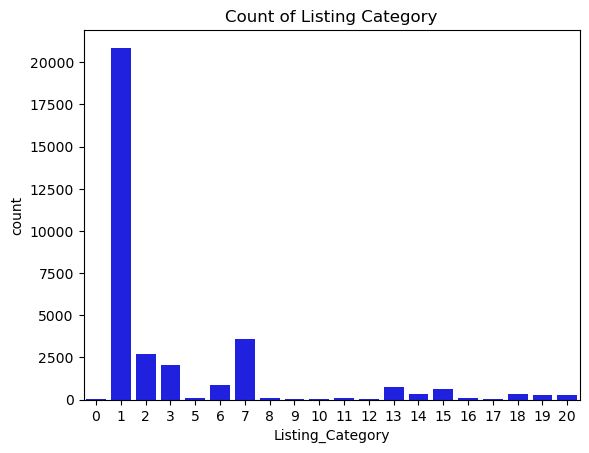

In [13]:
sns.countplot(data = ndf, x = 'Listing_Category', color = 'blue');
plt.title('Count of Listing Category');

**Listing Categories**

0-Not Available,1-Debt Consolidation.2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loan

#### State with the Highest Number of Borrowers

In [74]:
 ndf.Borrower_State.value_counts()

CA    4141
NY    2294
TX    2184
FL    2043
IL    1756
OH    1358
GA    1343
NJ    1077
VA    1073
MI    1067
Name: Borrower_State, dtype: int64

### Employment Status Of Borrowers

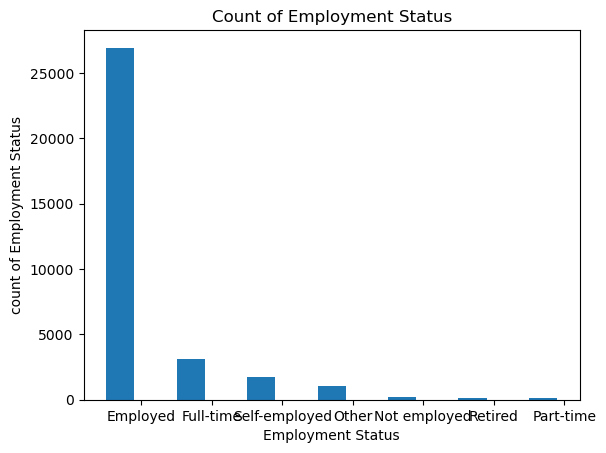

In [24]:
x = ndf.Employment_Status.value_counts().index
y = ndf.Employment_Status.value_counts().values
# Set the width of the bars and the spacing between them
bar_width = 0.4
spacing = 0.2

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(x, y, width=bar_width)

# Adjust the position of the bars to add spacing between them
ax.set_xticks([i + (bar_width + spacing) / 2 for i in range(len(x))])
ax.set_xticklabels(x)
plt.title('Count of Employment Status');
plt.ylabel('count of Employment Status');
plt.xlabel('Employment Status')

# Show the plot
plt.show()


### Does Prosper Loan Need to Do more work collecting loans?

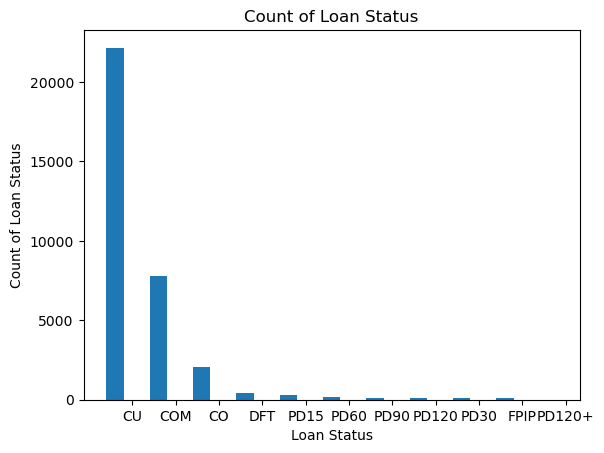

In [113]:
x = ndf.Loan_Status.value_counts().index
y = ndf.Loan_Status.value_counts().values
# Set the width of the bars and the spacing between them
bar_width = 0.4
spacing = 0.4

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(x, y, width=bar_width)

# Adjust the position of the bars to add spacing between them
ax.set_xticks([i + (bar_width + spacing) / 2 for i in range(len(x))])
ax.set_xticklabels(x)
plt.title('Count of Loan Status');
plt.ylabel('Count of Loan Status');
plt.xlabel('Loan Status');

# Show the plot
plt.show()

**Loan Status**

Current-CU, Completed-COM, Chargedoff-CO,Defaulted-DF,PastDue(1-15)-PD15, PastDue(16-30)-PD30,PastDue(31-60)-PD60,
PasDue(61-90)-PD90,PastDue(90-120)-PD120,PastDue(120>)-PD120+,FinalPaymentInProgress-FPIP

## Are Most Borrowers Home Owners?

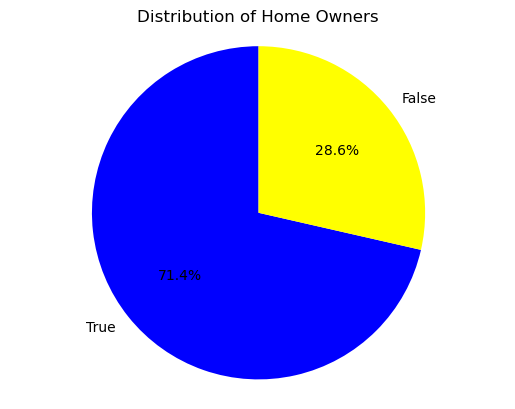

In [16]:
labels=ndf.Is_Borrower_Homeowner.value_counts().index

colors=['blue', 'yellow']
sizes= [1500, 600]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Home Owners')
plt.show()

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Did homeowners borrow money to renovate their homes?

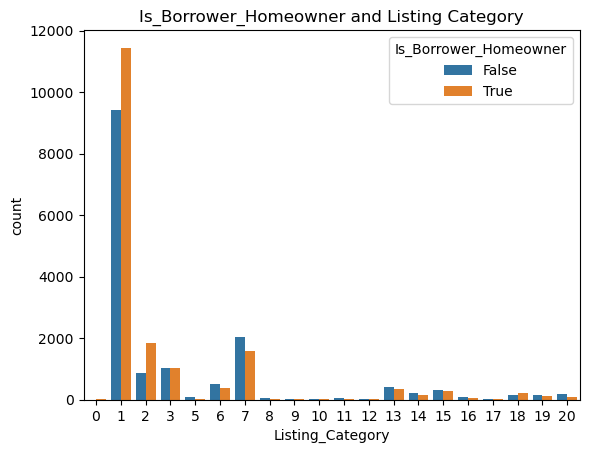

In [48]:
sns.countplot(data =ndf, x='Listing_Category', hue = 'Is_Borrower_Homeowner');
plt.title('Is_Borrower_Homeowner and Listing Category');

**Listing Categories**

0-Not Available,1-Debt Consolidation.2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loan

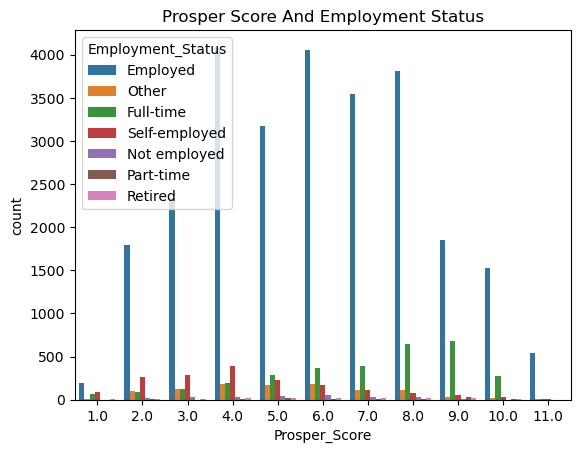

In [52]:
sns.countplot(data =ndf, x='Prosper_Score', hue = 'Employment_Status');
plt.title('Prosper Score And Employment Status');

***Prosper Score***

A customer risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best.
The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best and 1 being the lowest risk score.

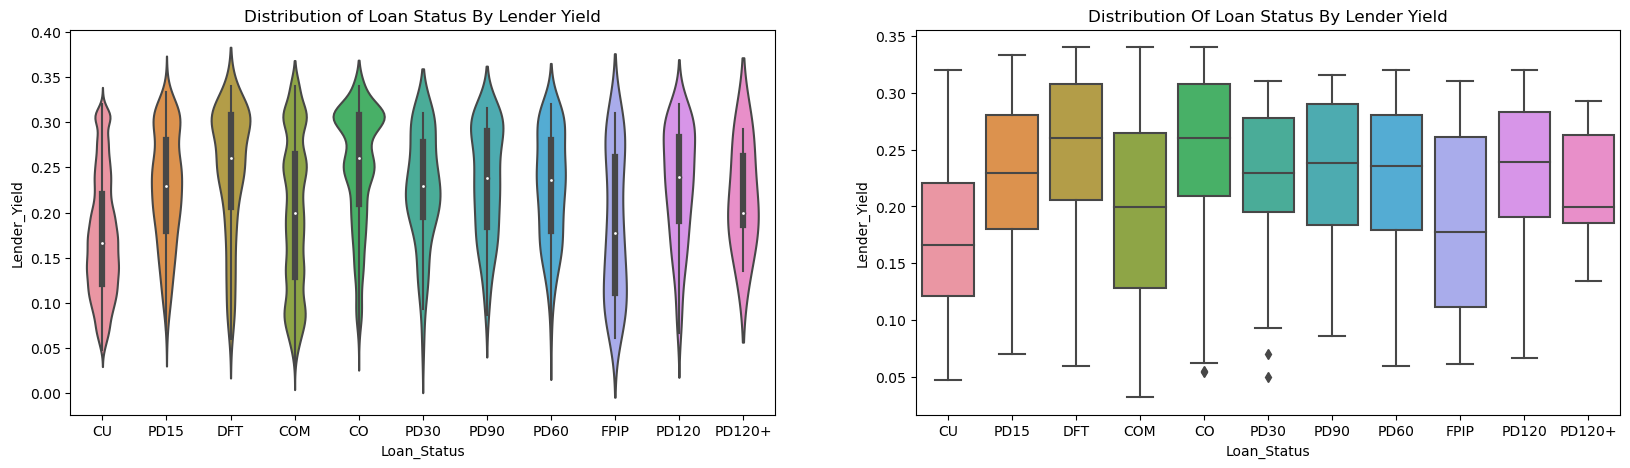

In [117]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.violinplot(data =ndf, x = 'Loan_Status', y = 'Lender_Yield');
plt.title('Distribution of Loan Status By Lender Yield');

plt.subplot(1,2,2)
sns.boxplot(data =ndf, x= 'Loan_Status',y = 'Lender_Yield');
plt.title('Distribution Of Loan Status By Lender Yield');


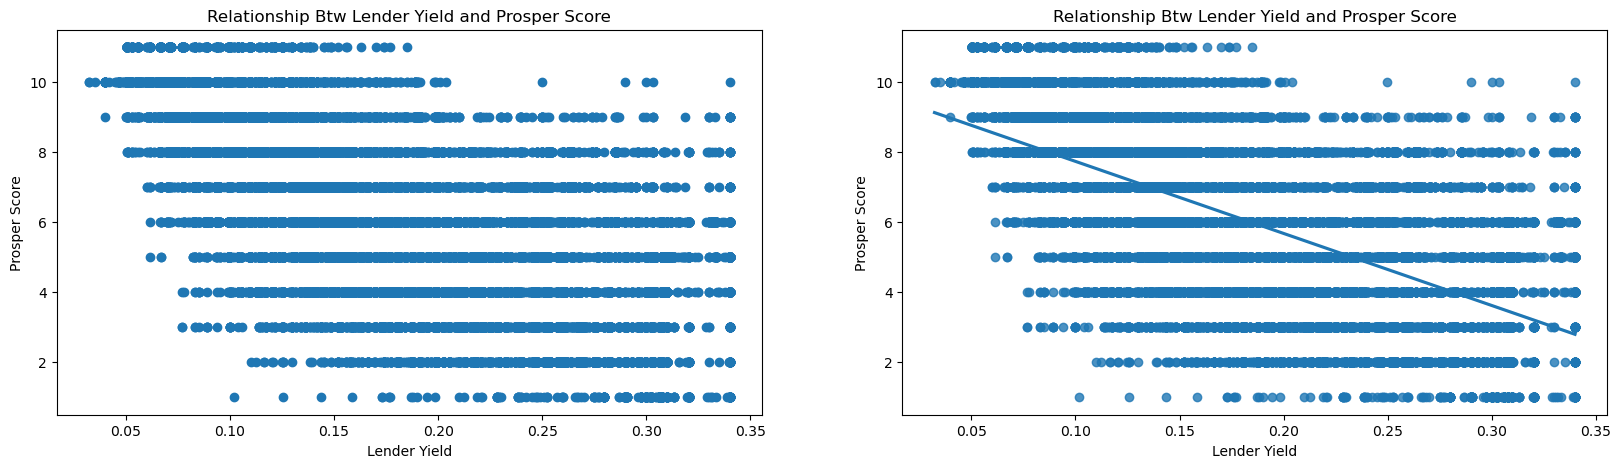

In [119]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(data = ndf, x = 'Lender_Yield', y = 'Prosper_Score');
plt.title('Relationship Btw Lender Yield and Prosper Score');
plt.xlabel('Lender Yield');
plt.ylabel('Prosper Score');

plt.subplot(1,2,2)
sns.regplot(data = ndf,x = 'Lender_Yield', y = 'Prosper_Score');
plt.title('Relationship Btw Lender Yield and Prosper Score');
plt.xlabel('Lender Yield');
plt.ylabel('Prosper Score');

### What the data is telling us
>The major reason for borrowing from Prosper loan is for Debt Consolidation.

> Most of the Borrower's are from California.

> Most Lenders are gainfully employed but seem to spend more than their means.

> Most Borrowers are homeowners and they borrow money not to improve their homes but service their debts.

> Most gainfully employed borrowers have bad credit score, this speaks to their spending habits.



## Recommendations
> Prospect scores should be done and used to assign loan more in California as there are more borrowers from the state

> Their is a high number of loan to be repaid compared to loans completed, loan collectors can be trained to improve this

> Loan should be issued only to borrowers with a good Prosper Score.